## dragon real estate

In [62]:
import pandas as pd

In [63]:
housing=pd.read_csv("data.csv")

In [64]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [65]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [66]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [67]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [68]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## plottin a graph

In [69]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

## Train and test splitting

In [70]:
# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]
    

In [71]:
# train_set,test_set=split_train_test(housing,0.2)

In [72]:
# print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)} \n");

In [73]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)} \n");

Rows in train set:404
 Rows in test set:102 



## 0 or 1 test and train dono me chiye

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [75]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [76]:
strat_test_set['CHAS'].value_counts()


CHAS
0    95
1     7
Name: count, dtype: int64

In [77]:
strat_test_set['CHAS'].value_counts()


CHAS
0    95
1     7
Name: count, dtype: int64

In [78]:
housing=strat_train_set.copy()

## Looking for Corelations

In [79]:
core_matrix=housing.corr()

In [80]:
core_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [81]:
# from pandas.plotting import scatter_matrix
# attributes=["MEDV","RM","ZN","LSTAT"]
# scatter_matrix(housing[attributes],figsize=(12,8)) #is se graph bnke aayega 

In [82]:
# housing.plot(kind="scatter",x="RM",y="MEDV",alpha=1)

## trying out attribute combinatioins

In [83]:
housing["TAXRM"]=housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [84]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

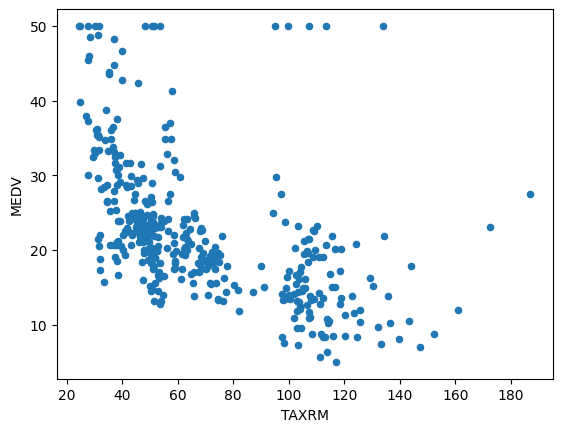

In [85]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=1)

In [86]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [87]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    399 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.5 KB


## Missing Attribute

In [88]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

In [89]:
# a=housing.dropna(subset=["RM"])

In [90]:
# a.shape

In [91]:
#median
# housing.drop("RM",axis=1)


In [92]:
# median=housing["RM"].median()
# housing["RM"].fillna(median)
# housing.shape

## Imputer

In [93]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [94]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## feature scaling

In [95]:
# 1. Min-max scaling(Normalization)
# sklearn provides a class called Minmax scaler for this
# 2. Standardization
# sklearn provides a class called standard scaler for this

## Creating a pipleine

In [96]:
from sklearn.pipeline import Pipeline

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler()),])#add as many as your want in your pipeline

In [99]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [100]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Select a desired fit model in real state

In [101]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [102]:
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()

In [103]:
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [104]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [105]:
prepared_data=my_pipeline.transform(some_data)

In [106]:
model.predict(prepared_data)

array([22.296, 25.129, 16.472, 23.237, 23.44 ])

In [107]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## find the rmse vale of our model

In [108]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [109]:
housing_predictions=model.predict(housing_num_tr)

In [110]:
lin_mse=mean_squared_error(housing_labels,housing_predictions)

In [111]:
lin_rmse=np.sqrt(lin_mse)

In [112]:
lin_rmse

1.2323069386679226

## Using better evaluatiion technique-Cross Validation

In [113]:
# 1 2 3 4 5 6 7 8 9  10
from sklearn.model_selection import cross_val_score

In [114]:
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [115]:
rmse_score=np.sqrt(-scores)

In [116]:
rmse_score# give error if we not implement num

array([2.76582854, 2.81424734, 4.44636679, 2.66720708, 3.54069532,
       2.67645563, 4.81225541, 3.31702264, 3.31087517, 3.05981614])

## Give value o mean,score and standard deviation

In [117]:
def print_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard deviaton",scores.std())

In [118]:
print_scores(rmse_score)

Scores [2.76582854 2.81424734 4.44636679 2.66720708 3.54069532 2.67645563
 4.81225541 3.31702264 3.31087517 3.05981614]
Mean 3.3410770063135993
Standard deviaton 0.7078672091207554


## Save file

In [119]:
from joblib import dump,load
dump(model,'rahulestate.joblib')

['rahulestate.joblib']

## Testing the model on data

In [120]:
import numpy as np
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_prediction=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)


In [121]:
final_rmse


2.962712532295295

In [122]:
print(final_prediction,list(y_test))

[24.581 11.122 25.738 22.238 18.628 15.034 20.211 14.719 32.543 41.337
 19.863 11.352 24.211 26.437 19.432 11.057 30.807 14.24  23.626 18.429
 20.136 17.215 17.248 22.064 17.788 31.723 15.882 33.262  9.075 34.057
 23.996 21.518 23.166 10.527 20.504 11.233 43.101 24.579 23.92  41.477
 23.859 30.164 20.32  20.813 18.562 33.526 44.397 20.384 20.322 22.083
 21.37  14.435 20.963 14.746 25.409 33.398 41.978 29.776 19.403 20.975
 47.346  9.698 18.938 24.894 14.868 33.929 19.951 17.972 19.364 34.58
 26.563 22.849 21.483 22.317 35.338 12.499 15.867 20.112 20.724 21.569
 22.693 21.187 14.242 22.934 20.43  21.209 14.331 21.709 21.399 23.628
 18.602 27.141  7.072 26.69  18.694 28.805 19.813 31.818 14.421 26.743
 21.258 20.207] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [124]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.5009123 , -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28867984,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13688444, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04693161, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])